#  Attempt at Using Seaborn/Matplotlib to provide production quality visualization


In [2]:
# Thanks to Phillip Helita for getting me started with "data storytelling" using Matplotlib/Seaborn
# Brandon Rohrer
# Matplotlib (John Hunter and many others)
# Storytelling with Data book which I own.
# I then found this masterpiece
# https://github.com/empathy87/storytelling-with-data (by a data scientist in Russia, small world after all?)

## Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns;sns.set_style()

#### Dummy data (from Phillip's blog)

In [3]:
# Code copied from 
# https://medium.com/@phillipheita/storytelling-with-data-ina-python-a6e1eebfa91b

df2 = pd.DataFrame({'Month':['January','February','March','April','May','June','July','August','September','October','November','December'],
                   'Ticket_Volume_Received':[160,184,241,149,180,161,132,202,160,139,149,177],
                   'Ticket_Volume_Processed':[160,184,237,148,181,150,123,156,126,104,124,140]})
names= ['January','February','March','April','May','June','July','August','September','October','November','December']
names2= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [4]:
df2.head()

,Month,Ticket_Volume_Received,Ticket_Volume_Processed
0,January,160,160
1,February,184,184
2,March,241,237
3,April,149,148
4,May,180,181


#### Here is code from Phillip's blog which produces the old fashioned looking chart

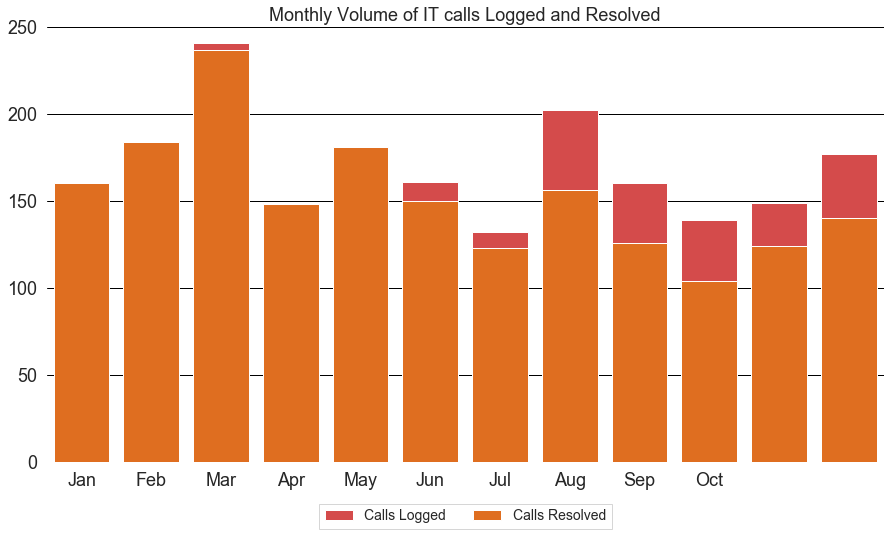

In [5]:
# Of course, the viz gig is largely about colours 
# Hue, Saturation, Intensity. I haven't mastered this part.

palette=['#eb3434', '#eb7a34', '#ebae34']

%matplotlib inline

# Plot
#sns.set_style("whitegrid")

sns.set(style='white')

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

#sharpness
plt.rcParams['figure.dpi'] = 1000


# Variables that define subsets of the data, which will be drawn on separate facets in the grid.
sns.barplot(x=df2.index,y=df2['Ticket_Volume_Received'],data=df2,label = 'Calls Logged',color='#eb3434',ax=ax)
sns.barplot(x=df2.index,y=df2['Ticket_Volume_Processed'],data=df2,label = 'Calls Resolved',color='#FF6800',ax=ax)

# Title
plt.title('Monthly Volume of IT calls Logged and Resolved',fontsize=18,ha='center')


# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),fancybox=False, shadow=False, ncol=5,fontsize=14)

plt.grid(axis='y')
plt.ylabel('')
plt.ylim(0,250)

# Axes
ax.set(xticks=range(0, 10), xticklabels=list(names2) )
ax.tick_params(axis='both', which='major', labelsize=18)

# Remove borders
sns.despine(left=True, bottom=True);

plt.grid(axis='y', color="black", which="major")

plt.savefig ( 'plots/prior_example')

In [7]:
# General settings for Seaborn

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
#sharpness
plt.rcParams['figure.dpi'] = 1000
#sns.color_palette("muted") 


#### The blog then goes ahead and replicate's Cole's line chart make-over. I have taken that code and modified it to produce the output below. <br>
It's a lot of code, however, mostly like a macro.  <br>
The key learnings were:<br>
a) Image Sharpness is important<br>
b) Use Brandon Rohrer's advice to manually place subplots (one way to obtain a proper border) <br>
   but note that this requires a hack (see code) <br>
c) The plot is built as a series of layers which is intuitive

In [8]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [9]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

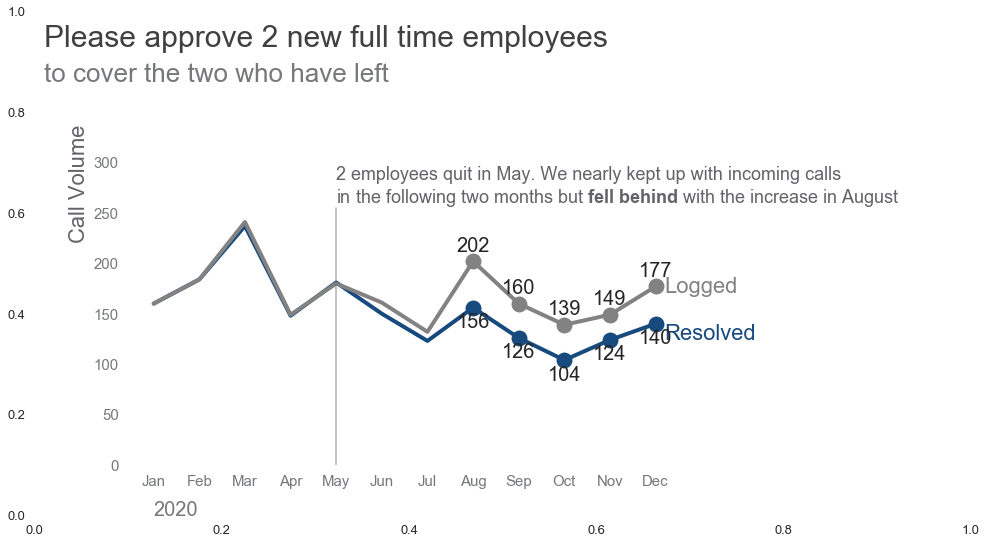

In [29]:
%matplotlib inline

# Additional series (figures for months from may onward) 

#callslogged
y = [202,160,139,149,177]
x = [7, 8, 9, 10, 11]

#calls handled
y1 = [156,126,104,124,140]
x1 = [7, 8, 9, 10, 11]

# Plot defaults
#plt.rc('font', size=14)            # controls default text sizes
#plt.rcParams['figure.dpi'] = 1000 # sharpness
#sns.set(style='white', font="Calibri")  # Comic Sans MS , Arial, Open Sans (not there)

# colours
logged_colour     = GRAY6
resolved_colour   = BLUE1
annotation_colour = GRAY4


fig = plt.figure(figsize=(13,7), facecolor = "white")

sns.set_style ("white")

# Add a dummy subplot, this is a hack to get the figure to retain it's specified size.
ax0 = fig.add_axes( (0,0,1,1))
#ax0.axis('Off') # don't draw anything.

#ax.set_title ( 'Please approve 2 new full time employees', fontsize=20, y = 1.05, color=GRAY5)

# Add the title before drawing the real subplot
title_text = 'Please approve 2 new full time employees'
ax0.text( 0.01, 0.93,
         title_text, #+ ' '*27,
         fontsize=30,
         color=GRAY2)#,
         # put a rectangular box around the text to set a background color
         #bbox={'facecolor': GRAY7, 'pad': 12, 'edgecolor': "None"})

title_text = 'to cover the two who have left'
ax0.text(0.01, 0.86,
         title_text, #+ ' '*27,
         fontsize=26,
         color=GRAY5)        


# Now position the real subplot so that it has a bigger border
ax = fig.add_axes( (0.1,0.1,0.6,0.6))

ax.text(0,-50 ,
         '2020',
         fontsize=20,
         color=GRAY5)        

# ------------------------------------------------------------
# Plot drawing
# ------------------------------------------------------------

sns.lineplot(x=df2.index,y=df2['Ticket_Volume_Processed'],data=df2,marker=None,markersize=10,lw=4,label = 'Calls Resolved',color= resolved_colour,ax=ax)
sns.lineplot(x=df2.index,y=df2['Ticket_Volume_Received'],data=df2,marker=None,markersize=10,lw=4,label = 'Calls Logged',color= logged_colour,ax=ax)

# Line text (legend)
y_last_logged = df2.iloc [ df2.shape[0]-1, 1 ]  
y_last_resolved = df2.iloc [ df2.shape[0]-1, 2 ] 

# Line Labels
ax.text(11+0.2, y_last_logged , 'Logged',     ha='left',  va='center', fontsize=22,color= logged_colour)
ax.text(11+0.2, y_last_resolved , 'Resolved', ha='left', va='top', fontsize=22,color= resolved_colour)

# Annotation
annotation_text = "2 employees quit in May. We nearly kept up with incoming calls \n" + \
                  "in the following two months but " +  \
                  '$\\bf{fell\ behind}$' + ' with the increase in August'  
    
plt.annotate(annotation_text,xy=(4,60),xytext=(4,260),color=annotation_colour,fontsize=18)

# Add annotation line
plt.axvline(x=4, ymin=0, ymax=0.85, color=annotation_colour, alpha=0.5)

# Points
sns.scatterplot(x=x, y=y, color=logged_colour, s=300)
sns.scatterplot(x=x1, y=y1, color=resolved_colour, s=300)

# Add marker labels: logged
for i, txt in enumerate(y):
    ax.annotate(txt, (x[i], y[i]+ 10),fontsize=20, ha="center")

# resolved
for i, txt in enumerate(y1):
    ax.annotate(txt, (x[i], y1[i]- 20),fontsize=20, ha="center")

# ----------------------------------------------------------

#plt.grid(axis='y')

plt.ylabel('')
plt.ylim(0,300)

# Axis
#ax.yaxis.set_ticklabels( df.Item ,fontsize=12,color=GRAY5 )
#ax.set(xticks=range(0, 12), xticklabels=list(names2), color=GRAY5 )
#ax.tick_params(axis='both', which='major', labelsize=20)

ax.set(xticks=range(0, 12), xticklabels=list(names2) )
ax.tick_params(axis='both', which='major', labelsize=15, labelcolor=GRAY5, color=GRAY5)

# Change the colors of the left and bottom borders (fade into the background)
#ax.spines['bottom'].set_color('lightgrey')
#ax.spines['top'].set_color('lightgrey')

ax.legend().set_visible(False)
    
# Y axis label
ax.yaxis.set_label_coords(-0.07, 0.93)
plt.ylabel('Call Volume',fontsize=22,color =annotation_colour)

# Remove borders
sns.despine(left=True, bottom=True);

plt.savefig ( 'plots/annotated_line_chart')